In [3]:
!pip install opencv-python matplotlib numpy


In [20]:
import cv2 as cv
import matplotlib.pyplot as Quan
!pip install opencv-python


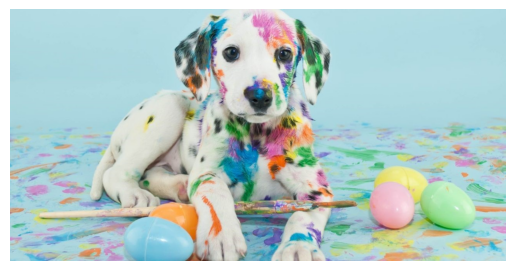

In [24]:
# Đường dẫn tới file bạn đã tải lên
image = cv.imread('dog.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Chuyển ảnh sang định dạng RGB

Quan.imshow(image)
Quan.axis("off")
Quan.show()


**Thresholding để phân đoạn ảnh**

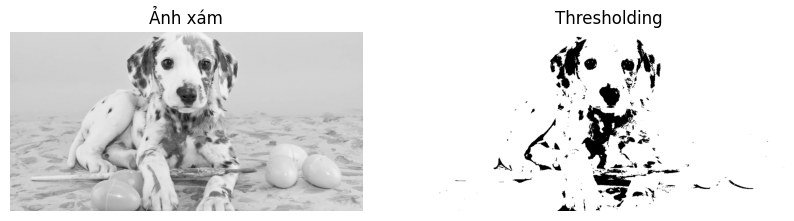

In [25]:
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)  # Chuyển ảnh sang mức xám
_, binary = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

Quan.figure(figsize=(10, 5))
Quan.subplot(1, 2, 1), Quan.imshow(gray, cmap="gray"), Quan.title("Ảnh xám"), Quan.axis("off")
Quan.subplot(1, 2, 2), Quan.imshow(binary, cmap="gray"), Quan.title("Thresholding"), Quan.axis("off")
Quan.show()


**Otsu Algorithm để phân đoạn ảnh vân tay**

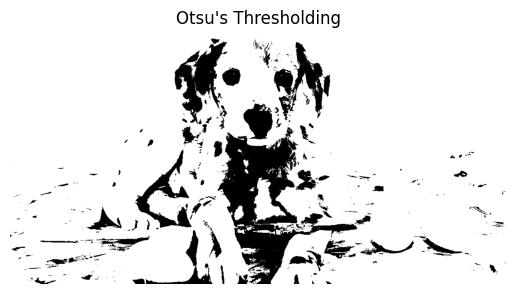

In [26]:
_, otsu = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

Quan.imshow(otsu, cmap="gray")
Quan.title("Otsu's Thresholding")
Quan.axis("off")
Quan.show()


3.K-Means Clustering trong phân đoạn **ảnh**

In [14]:
import numpy as np

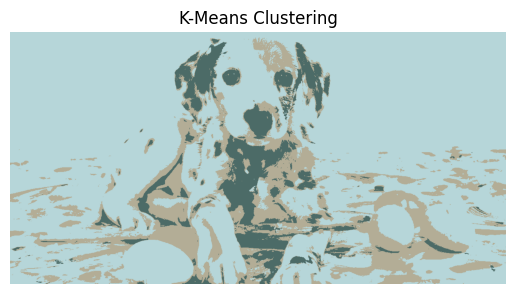

In [27]:
pixel_values = image.reshape((-1, 3))  # Chuyển đổi thành danh sách điểm ảnh
pixel_values = np.float32(pixel_values)

# Áp dụng K-Means với 3 cụm màu
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Chuyển kết quả về ảnh
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

Quan.imshow(segmented_image)
Quan.title("K-Means Clustering")
Quan.axis("off")
Quan.show()


**4. Sử dụng thuật toán Region growing**

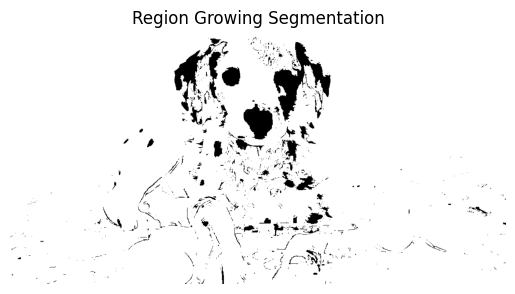

In [28]:
def region_growing(img, seed):
    h, w = img.shape
    segmented = np.zeros_like(img)
    visited = np.zeros_like(img, dtype=bool)

    stack = [seed]  # Khởi tạo danh sách điểm cần kiểm tra
    threshold = 10  # Ngưỡng để xét xem điểm có thuộc vùng không

    while stack:
        x, y = stack.pop()
        if visited[x, y]:
            continue
        visited[x, y] = True
        segmented[x, y] = 255

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Duyệt 4 hướng lân cận
            nx, ny = x + dx, y + dy
            if 0 <= nx < h and 0 <= ny < w and not visited[nx, ny]:
                if abs(int(img[nx, ny]) - int(img[x, y])) < threshold:
                    stack.append((nx, ny))

    return segmented

seed_point = (100, 100)  # Chọn một điểm hạt giống (tùy chỉnh)
region = region_growing(gray, seed_point)

Quan.imshow(region, cmap="gray")
Quan.title("Region Growing Segmentation")
Quan.axis("off")
Quan.show()


Split and **Merge**

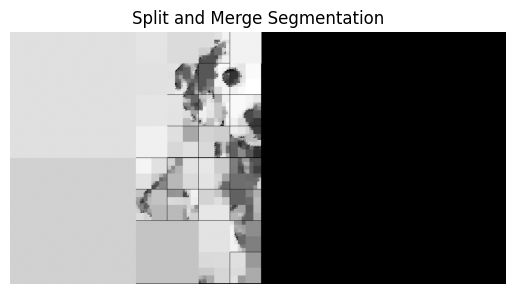

In [29]:
def split_and_merge(img, threshold=30):
    h, w = img.shape
    segmented = np.zeros_like(img)

    def split(x, y, size):
        if size < 2:
            return

        mean = np.mean(img[x:x+size, y:y+size])
        std = np.std(img[x:x+size, y:y+size])

        if std > threshold:
            half = size // 2
            split(x, y, half)
            split(x + half, y, half)
            split(x, y + half, half)
            split(x + half, y + half, half)
        else:
            segmented[x:x+size, y:y+size] = mean

    split(0, 0, h)
    return segmented

split_merged = split_and_merge(gray)

Quan.imshow(split_merged, cmap="gray")
Quan.title("Split and Merge Segmentation")
Quan.axis("off")
Quan.show()


**6. Phân đoạn ảnh với Edge-based sigmentation**

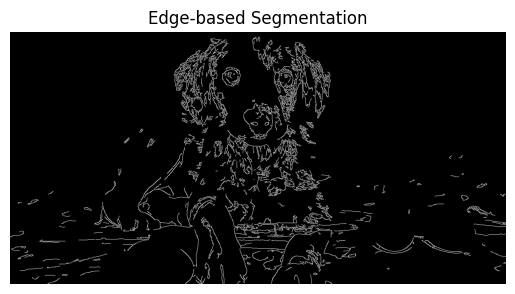

In [19]:
edges = cv.Canny(gray, 100, 200)

Quan.imshow(edges, cmap="gray")
Quan.title("Edge-based Segmentation")
Quan.axis("off")
Quan.show()
